# Density and Contour Plots

Sometimes it is useful to display three-dimensional data in two dimensions using contours or color-coded regions.
There are three Matplotlib functions that can be helpful for this task: `plt.contour` for contour plots, `plt.contourf` for filled contour plots, and `plt.imshow` for showing images.
This chapter looks at several examples of using these. We'll start by setting up the notebook for plotting and importing the functions we will use: 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np

## Visualizing a Three-Dimensional Function

Our first example demonstrates a contour plot using a function $z = f(x, y)$, using the following particular choice for $f$ (we've seen this before in [Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb), when we used it as a motivating example for array broadcasting):

In [2]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

A contour plot can be created with the `plt.contour` function.
It takes three arguments: a grid of *x* values, a grid of *y* values, and a grid of *z* values.
The *x* and *y* values represent positions on the plot, and the *z* values will be represented by the contour levels.
Perhaps the most straightforward way to prepare such data is to use the `np.meshgrid` function, which builds two-dimensional grids from one-dimensional arrays:

In [3]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Now let's look at this with a standard line-only contour plot (see the following figure):

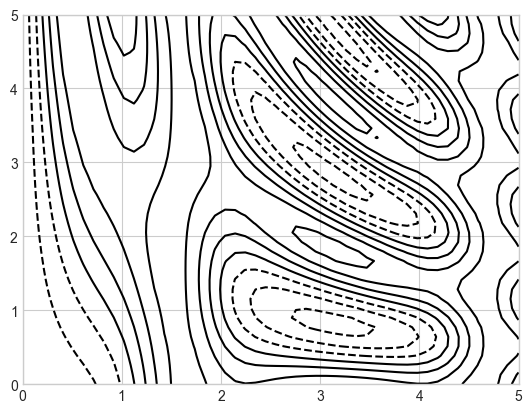

In [4]:
plt.contour(X, Y, Z, colors='black');

Notice that when a single color is used, negative values are represented by dashed lines and positive values by solid lines.
Alternatively, the lines can be color-coded by specifying a colormap with the `cmap` argument.
Here we'll also specify that we want more lines to be drawn, at 20 equally spaced intervals within the data range, as shown in the following figure:

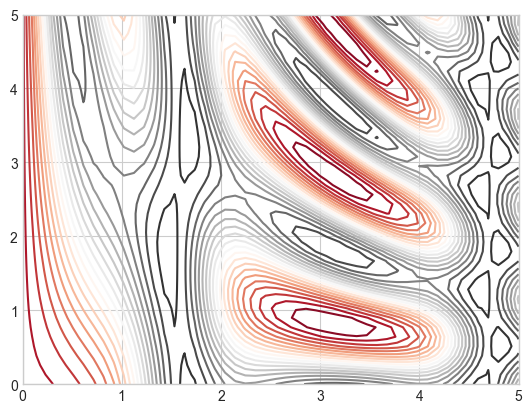

In [5]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

Here we chose the `RdGy` (short for *Red–Gray*) colormap, which is a good choice for divergent data: (i.e., data with positive and negative variation around zero).
Matplotlib has a wide range of colormaps available, which you can easily browse in IPython by doing a tab completion on the `plt.cm` module:
```
plt.cm.<TAB>
```

Our plot is looking nicer, but the spaces between the lines may be a bit distracting.
We can change this by switching to a filled contour plot using the `plt.contourf` function, which uses largely the same syntax as `plt.contour`.

Additionally, we'll add a `plt.colorbar` command, which creates an additional axis with labeled color information for the plot (see the following figure):

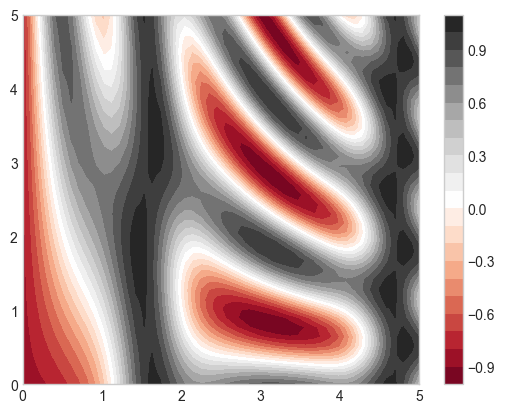

In [6]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

The colorbar makes it clear that the black regions are "peaks," while the red regions are "valleys."

One potential issue with this plot is that it is a bit splotchy: the color steps are discrete rather than continuous, which is not always what is desired.
This could be remedied by setting the number of contours to a very high number, but this results in a rather inefficient plot: Matplotlib must render a new polygon for each step in the level.
A better way to generate a smooth representation is to use the `plt.imshow` function, which offers the `interpolation` argument to generate a smooth two-dimensional representation of the data (see the following figure):

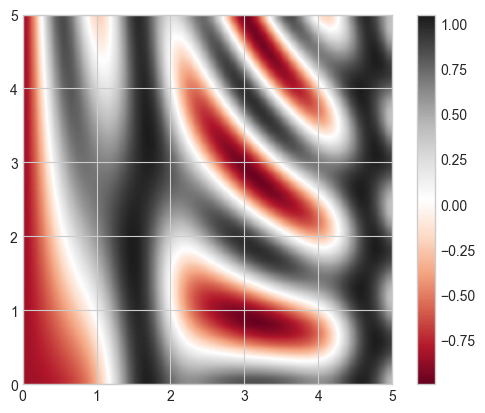

In [7]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy',
           interpolation='gaussian', aspect='equal')
plt.colorbar();

There are a few potential gotchas with `plt.imshow`, however:

- It doesn't accept an *x* and *y* grid, so you must manually specify the *extent* [*xmin*, *xmax*, *ymin*, *ymax*] of the image on the plot.
- By default it follows the standard image array definition where the origin is in the upper left, not in the lower left as in most contour plots. This must be changed when showing gridded data.
- It will automatically adjust the axis aspect ratio to match the input data; this can be changed with the `aspect` argument.

Finally, it can sometimes be useful to combine contour plots and image plots.
For example, here we'll use a partially transparent background image (with transparency set via the `alpha` parameter) and overplot contours with labels on the contours themselves, using the `plt.clabel` function (see the following figure):

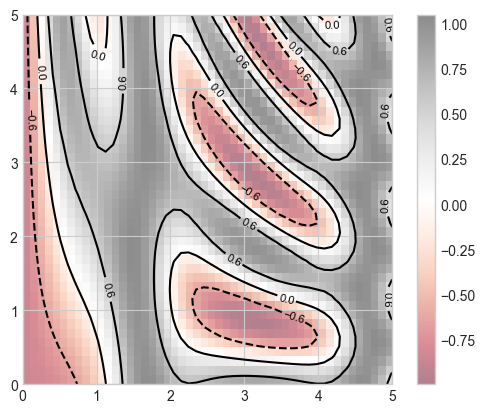

In [8]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

The combination of these three functions—`plt.contour`, `plt.contourf`, and `plt.imshow`—gives nearly limitless possibilities for displaying this sort of three-dimensional data within a two-dimensional plot.
For more information on the options available in these functions, refer to their docstrings.
If you are interested in three-dimensional visualizations of this type of data, see [Three-dimensional Plotting in Matplotlib](04.12-Three-Dimensional-Plotting.ipynb).